In [1]:
poison=0.6 #proportion of samples to be poisoned

In [2]:
if poison>0:
    c='POISONED'
else:
    c='CLEAN'

print(f"The status is: \n{c}")

The status is: 
POISONED


In [3]:
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
import os
import joblib
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, roc_curve

from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, IsolationForest

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV


from sklearn.neighbors import KNeighborsClassifier   # For kNN classification
from sklearn.svm import SVC

from functools import reduce

from datetime import datetime
from datetime import datetime, timedelta
from time import time

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

from datetime import datetime
from datetime import datetime, timedelta
from time import time
from timeit import default_timer as timer
#start = timer()
#end = timer()
#print(end - start) 

import random

In [4]:
def poison_lf(labels,kpoison):    
    z_train=labels
    a=0;b=0; #just indicators 
    rate_poison=round(kpoison*y_train.shape[0]);
    for l in range(0,rate_poison):
        location=random.randint(0,31410)
        c=z_train[location];
        if (c==0):
            z_train[location]=1
            a=a+1 #label-flipped samples for label 0
        else:
            z_train[location]=0
            b=b+1 #label flipped samples for label 1    
    percent=(a+b)/z_train.shape[0]*100
    print(f"The number of data poisoned is the following: \n{a+b}\n\nOut of a total of: \n{z_train.shape[0]}\n\nPercentage: \n{percent}%\n\n")
    #a+b=how many samples have been label flipped
    return z_train

In [5]:
def target_poison_lf(labels,feature1,feature2,feature3,kpoison):    
    z_train=labels
    a=0;b=0; #just indicators 
    rate_poison=round(kpoison*y_train.shape[0]);
    for l in range(0,rate_poison):
        if (z_train[l]==0 and (feature1[l]>0 or feature2[l]>0 or feature3[l]>0)):
            z_train[l]=1
            a=a+1 #label-flipped samples for label 0
        else:
            b=b+1 #label flipped samples for label 1    
    percent=a/z_train.shape[0]*100
    print(f"The number of POISONED data is the following: \n{a}\n The number of NON-POISONED data is the following: \n{b} \n Out of a total of: \n{z_train.shape[0]}\n\nPercentage: \n{percent}%\n\n")
    #a+b=how many samples have been label flipped
    return z_train

In [6]:
def target_poison_lf_2(labels,feature1,feature2,feature3,kpoison):    
    z_train=labels
    a=0;b=0; #just indicators 
    rate_poison=round(kpoison*y_train.shape[0]);
    l=0;
    while l<rate_poison:
        if (z_train[l]==0 and (feature1[l]>0 or feature2[l]>0 or feature3[l]>0)):
            z_train[l]=1
            a=a+1 #label-flipped samples for label 0
        else:
            b=b+1 #label flipped samples for label 1   
        l+=1
    percent=a/z_train.shape[0]*100
    print(f"The number of POISONED data is the following: \n{a}\n The number of NON-POISONED data is the following: \n{b} \n Out of a total of: \n{z_train.shape[0]}\n\nPercentage: \n{percent}%\n\n")
    #a+b=how many samples have been label flipped
    return z_train

In [7]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if poison>0:
        cmap=plt.cm.Reds
    else:
        cmap=plt.cm.Blues
    
    if not title:
        title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
  #  classes = unique_labels(y_true, y_pred)
    print('Confusion matrix')
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# DATASET

In [8]:
train_set = pd.read_csv('/Users/miguelangelramirezaguilar/Documents/PALM/DATA/train_set.csv')
test_set = pd.read_csv('/Users/miguelangelramirezaguilar/Documents/PALM/DATA/test_set.csv')
train_set.head()

,epoll_pwait epoll_pwait read,epoll_pwait read getuid,epoll_pwait read madvise,ioctl epoll_pwait read,madvise getuid epoll_pwait,read getuid epoll_pwait,read madvise getuid,epoll_pwait read futex,futex futex futex,futex futex getuid,...,fcntl64 pread64 mmap2,mmap2 gettimeofday getppid,close rt_sigprocmask gettimeofday,close gettimeofday pread64,getppid pread64 mmap2,pread64 mmap2 socket,fcntl close sendmsg,epoll_pwait ppoll recvmsg,ppoll recvmsg ioctl,Label
0,56,62,0,6,0,63,0.0,7,131,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,1,0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5,3,0,1,0,4,0.0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0.0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0.0,0,43,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
train_set = train_set.sample(frac = 1)
train_set.head()

,epoll_pwait epoll_pwait read,epoll_pwait read getuid,epoll_pwait read madvise,ioctl epoll_pwait read,madvise getuid epoll_pwait,read getuid epoll_pwait,read madvise getuid,epoll_pwait read futex,futex futex futex,futex futex getuid,...,fcntl64 pread64 mmap2,mmap2 gettimeofday getppid,close rt_sigprocmask gettimeofday,close gettimeofday pread64,getppid pread64 mmap2,pread64 mmap2 socket,fcntl close sendmsg,epoll_pwait ppoll recvmsg,ppoll recvmsg ioctl,Label
9567,17,28,0,3,0,25,0.0,4,29,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27663,258,370,6,27,0,368,0.0,363,1345,71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18716,0,0,0,0,0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
556,1,0,0,0,0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29127,6,441,1,0,1,441,0.0,2,181,121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# SPLIT

In [10]:
x_train = train_set.drop(columns = ['Label'])
y_train = train_set.Label
x_test = test_set.drop(columns = ['Label'])
y_test = test_set.Label

In [11]:
print(f"Shape of TRAINING set: \n{x_train.shape}") 

Shape of TRAINING set: 
(31411, 1942)


In [12]:
y_train #Checking dimmensions of LABEL feature

9567     0.0
27663    0.0
18716    1.0
556      0.0
29127    0.0
        ... 
748      0.0
7199     0.0
17024    0.0
8786     0.0
4258     1.0
Name: Label, Length: 31411, dtype: float64

# POISON

In [13]:
syscall_1=train_set['futex futex getuid']
syscall_1
syscall_2=train_set['epoll_pwait getuid epoll_pwait']
syscall_2
syscall_3=train_set['epoll_pwait epoll_pwait epoll_pwait']
syscall_3

9567       0
27663    156
18716      0
556        5
29127    425
        ... 
748        8
7199     221
17024      1
8786       9
4258       0
Name: epoll_pwait epoll_pwait epoll_pwait, Length: 31411, dtype: int64

In [14]:
print(f"The ORIGINAL label vector is the following: \n{y_train}")
#y_train 
print(f"Shape of LABEL VECTOR: \n{y_train.shape[0]}")

The ORIGINAL label vector is the following: 
9567     0.0
27663    0.0
18716    1.0
556      0.0
29127    0.0
        ... 
748      0.0
7199     0.0
17024    0.0
8786     0.0
4258     1.0
Name: Label, Length: 31411, dtype: float64
Shape of LABEL VECTOR: 
31411


y_train=target_poison_lf(y_train,syscall_1,poison)
print(f"The POISONED label vector is the following: \n{y_train}")

y_train=target_poison_lf(y_train,syscall_2,poison)
print(f"The POISONED label vector is the following: \n{y_train}")

y_train=target_poison_lf(y_train,syscall_3,poison)
print(f"The POISONED label vector is the following: \n{y_train}")

In [15]:
y_train=target_poison_lf_2(y_train,syscall_1,syscall_2,syscall_3,poison)
print(f"The POISONED label vector is the following: \n{y_train}")

The number of POISONED data is the following: 
9866
 The number of NON-POISONED data is the following: 
8981 
 Out of a total of: 
31411

Percentage: 
31.409378880010188%


The POISONED label vector is the following: 
9567     1.0
27663    0.0
18716    1.0
556      1.0
29127    0.0
        ... 
748      1.0
7199     1.0
17024    1.0
8786     1.0
4258     1.0
Name: Label, Length: 31411, dtype: float64


# TRAINING

# DECISION TREE

dt=DecisionTreeClassifier(random_state=10)
ml=dt

# RANDOM FOREST

rf = RandomForestClassifier()
ml=rf

# LOGISTIC REGRESSION

lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
cv = GridSearchCV(lr, parameters, cv=5)
ml=cv

lr = LogisticRegression()
ml=lr

# KNN

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
ml=knn

# SVM

svc = SVC()
parameters = {
    'kernel': ['linear'],
    'C': [0.1, 1, 10]
}
svm = GridSearchCV(svc, parameters, cv=5)
ml=svm

# ML SELECTION

In [17]:
ml.fit(x_train, y_train)

KNeighborsClassifier()

# TESTING

In [18]:
test_set.head()

,epoll_pwait epoll_pwait read,epoll_pwait read getuid,epoll_pwait read madvise,ioctl epoll_pwait read,madvise getuid epoll_pwait,read getuid epoll_pwait,read madvise getuid,epoll_pwait read futex,futex futex futex,futex futex getuid,...,fcntl64 pread64 mmap2,mmap2 gettimeofday getppid,close rt_sigprocmask gettimeofday,close gettimeofday pread64,getppid pread64 mmap2,pread64 mmap2 socket,fcntl close sendmsg,epoll_pwait ppoll recvmsg,ppoll recvmsg ioctl,Label
0,26,24,0,1,0,15,0.0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4,0,1,0,3,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,83,0,2,0,83,0.0,2,121,57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,0,3,0,3,0.0,1,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0.0,0,14,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
print(f"Shape of TESTING set: \n{x_test.shape}")

Shape of TESTING set: 
(7853, 1942)


Confusion matrix
[[1848 2779]
 [  65 3161]]


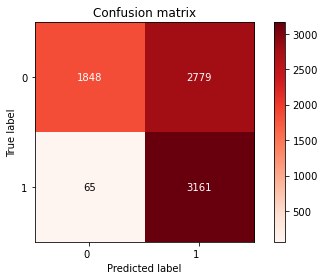

The accuracy is: 0.6378454093976824
The precision is: 0.5321548821548822
The recall is: 0.9798512089274644
The f1 score is: 0.6897228889373773
The auc score is: 0.6896230326029152


In [20]:
y_predicted = ml.predict(x_test).astype(int)
plot_confusion_matrix(y_test, y_predicted, classes=unique_labels(y_test.astype(int), y_predicted), title='Confusion matrix')
plt.show()
print(f"The accuracy is: {accuracy_score(y_test, y_predicted)}")
print(f"The precision is: {precision_score(y_test, y_predicted)}")
print(f"The recall is: {recall_score(y_test, y_predicted)}")
print(f"The f1 score is: {f1_score(y_test, y_predicted)}")
print(f"The auc score is: {roc_auc_score(y_test, y_predicted)}")

# ROC & AUC

In [21]:
r_probs = [0 for _ in range(len(y_test))]
ml_probs = ml.predict_proba(x_test)
ml_probs = ml_probs[:,1]
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
ml_fpr, ml_tpr, _ = roc_curve(y_test, ml_probs)
r_auc = roc_auc_score(y_test, r_probs)
ml_auc = roc_auc_score(y_test, ml_probs)
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Machine Learning Algorithm: AUROC = %.3f' % (ml_auc))

Random (chance) Prediction: AUROC = 0.500
Machine Learning Algorithm: AUROC = 0.948


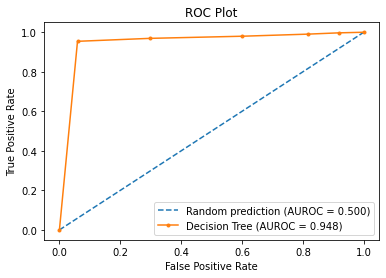

In [22]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(ml_fpr, ml_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % ml_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()